# Blurring Images

Use skimage functions to blur images.\
Where is blurring used?
- to remove noise from an image and concentrate on signal
- to compare specific areas in multiple images
- when edges are not really important, you can blur them out
\
The blurring effect averages out rapid changes in pixel intensity. A blur is a very common operation we need to perform before other tasks such as thresholding. There are several different blurring functions in the skimage.filters module. \
Focus in this notebook is on the **Gaussian blur**.

## Filters
In the day-to-day, macroscopic world, we have physical filters which separate out objects by size. A filter with small holes allows only small objects through, leaving larger objects behind. This is a good analogy for image filters. A high-pass filter will retain the smaller details in an image, filtering out the larger ones. A low-pass filter retains the larger features, analogous to what’s left behind by a physical filter mesh. High- and low-pass, here, refer to high and low spatial frequencies in the image. Details associated with high spatial frequencies are small, a lot of these features would fit across an image. Features associated with low spatial frequencies are large - maybe a couple of big features per image.

## Blurring
Blurring is to make something less clear or distinct. This could be interpreted quite broadly in the context of image analysis - anything that reduces or distorts the detail of an image might apply. Applying a low pass filter, which removes detail occurring at high spatial frequencies, is perceived as a blurring effect. A Gaussian blur is a filter that makes use of a Gaussian kernel.

## Kernels

A kernel can be used to implement a filter on an image. A kernel, in this context, is a small matrix which is combined with the image using a mathematical technique: convolution. Different sizes, shapes and contents of kernel produce different effects. The kernel can be thought of as a little image in itself, and will favour features of a similar size and shape in the main image. On convolution with an image, a big, blobby kernel will retain big, blobby, low spatial frequency features.

In [1]:
#import libraries
import skimage.io as skio
import matplotlib.pyplot as plt
import skimage.filters
import numpy as np
%matplotlib widget

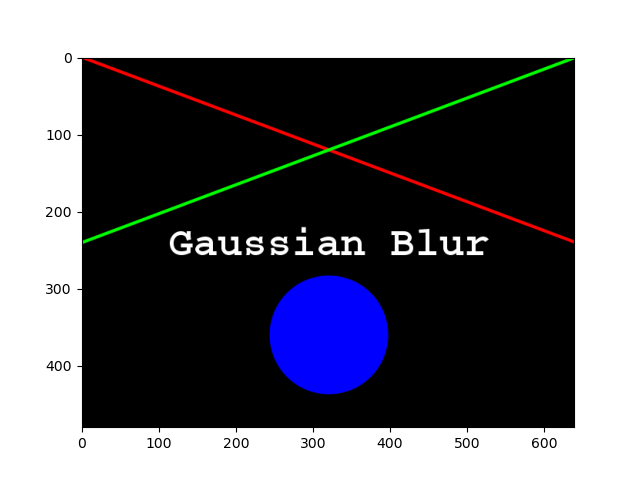

In [2]:
image = skio.imread("data/gaussian-original.png")
plt.subplots()
plt.imshow(image)

In [3]:
sigma = 3.0
blurred_image = skimage.filters.gaussian(image, sigma=(sigma, sigma), truncate=3.5, channel_axis=2) 
# truncate- how large is this going to be
# size of kernel depends on sigma and truncate
# size of kernel = sigma * truncate * 2
# the gaussian filter can be applied to images of any dimensionality
# channel_axis -> do not smoot across RBG channels, do it seperately for me

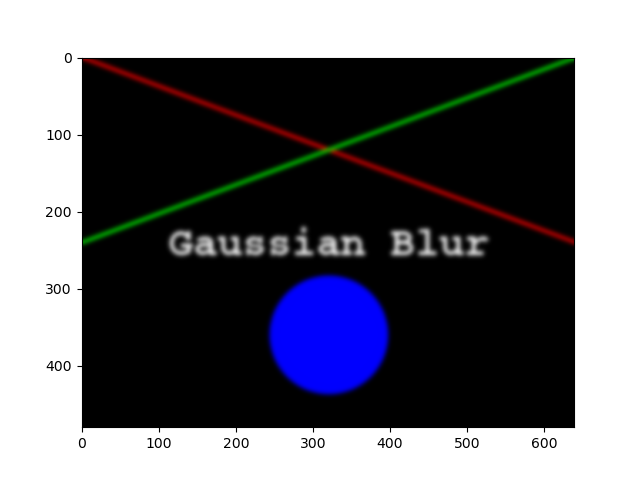

In [4]:
plt.subplots()
plt.imshow(blurred_image)

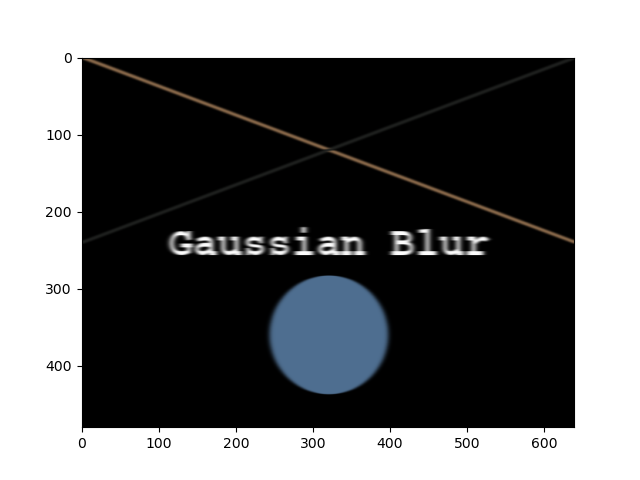

In [5]:
# channel_axis if False then it blurs across channel
blurred = skimage.filters.gaussian(image, sigma=(sigma, sigma), truncate=3.5, channel_axis=False) 
plt.subplots()
plt.imshow(blurred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


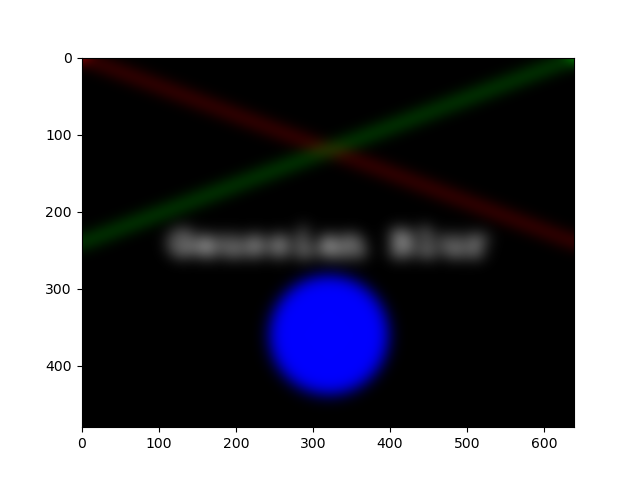

In [7]:
# larger sigma value
sigma = 10.0
blurred = skimage.filters.gaussian(image, sigma=(sigma, sigma), truncate=3.5, channel_axis=2) 
# size of the kernel obviously becomes bigger
# anticipated result is that it will be more blurred
plt.subplots()
plt.imshow(blurred)
#actual result is that the image is much more blurred

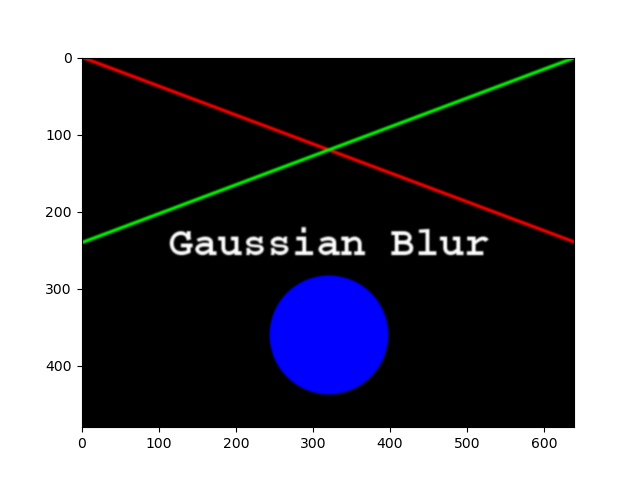

In [8]:
# smaller sigma value
sigma = 1.0
blurred = skimage.filters.gaussian(image, sigma=(sigma, sigma), truncate=3.5, channel_axis=2) 
# size of the kernel obviously becomes smaller
# anticipated result is that it will be less blurred (sharper)
plt.subplots()
plt.imshow(blurred)
#actual result is that the image is much less blurred

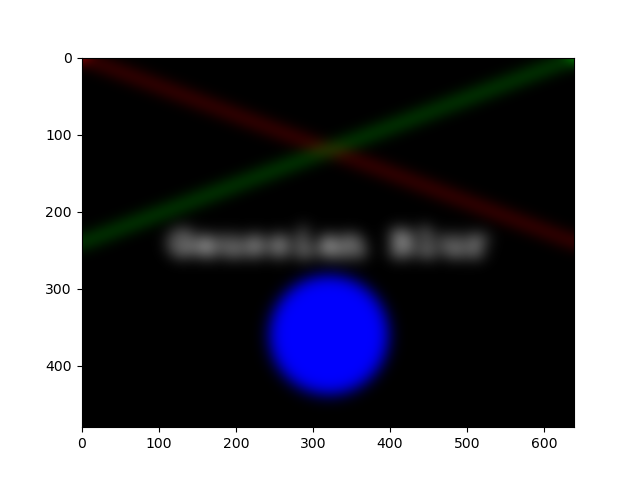

In [11]:
# larger sigma value + higher truncate values
sigma = 10.0
blurred = skimage.filters.gaussian(image, sigma=(sigma, sigma), truncate=10.0, channel_axis=2) 
# size of the kernel obviously becomes bigger
# anticipated result is that it will be more blurred
plt.subplots()
plt.imshow(blurred)
#actual result is that the image is same as one with larger sigma

In [10]:
skimage.filters.gaussian?

Signature:
skimage.filters.gaussian(
    image,
    sigma=1,
    output=None,
    mode='nearest',
    cval=0,
    multichannel=None,
    preserve_range=False,
    truncate=4.0,
    *,
    channel_axis=None,
)
Docstring:
Multi-dimensional Gaussian filter.


Parameters
----------
image : array-like
    Input image (grayscale or color) to filter.
sigma : scalar or sequence of scalars, optional
    Standard deviation for Gaussian kernel. The standard
    deviations of the Gaussian filter are given for each axis as a
    sequence, or as a single number, in which case it is equal for
    all axes.
output : array, optional
    The ``output`` parameter passes an array in which to store the
    filter output.
mode : {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}, optional
    The ``mode`` parameter determines how the array borders are
    handled, where ``cval`` is the value when mode is equal to
    'constant'. Default is 'nearest'.
cval : scalar, optional
    Value to fill past edges of

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


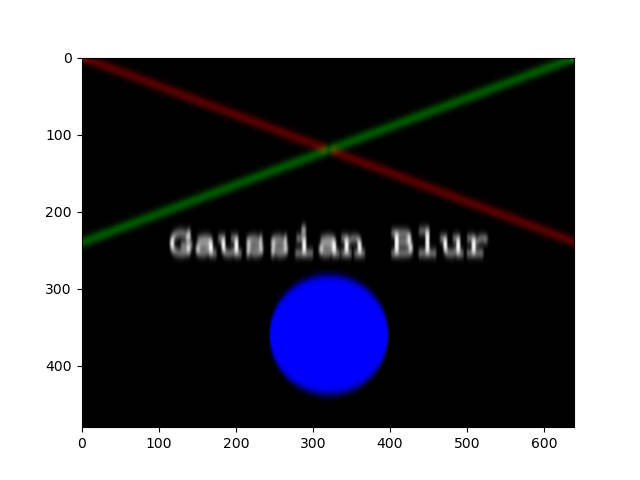

In [12]:
# larger x-sigma value, smaller y-sigma value
blurred = skimage.filters.gaussian(image, sigma=(5.0, 1.0), truncate=3.5, channel_axis=2) 
# anticipated result is that image will be more blurred in x direction than in y direction
plt.subplots()
plt.imshow(blurred)
#actual result is that the image is more blurred in x direction than y direction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


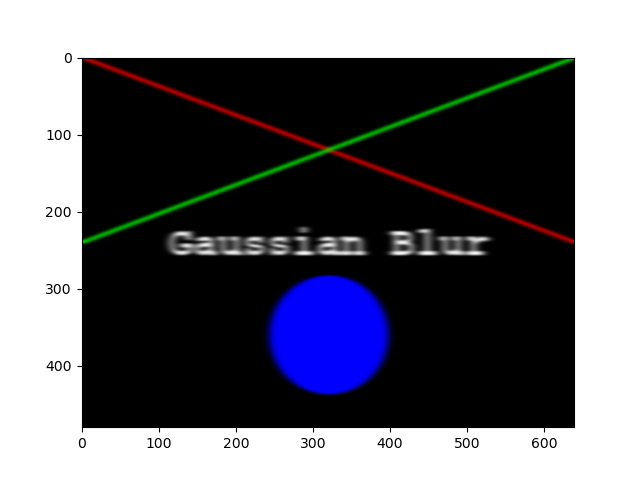

In [13]:
# larger y-sigma value, smaller x-sigma value
blurred = skimage.filters.gaussian(image, sigma=(1.0, 5.0), truncate=3.5, channel_axis=2) 
# anticipated result is that it will be more blurred in y direction than x direction
plt.subplots()
plt.imshow(blurred)
#actual result is that the image is more blurred in y direction than x direction